In [1]:
def bits2str(bits):
    r = b''
    for i in range(0, len(bits), 8):
        r += int(bits[i:i+8], 2).to_bytes(1, 'big')
    return r.decode('latin_1')

In [2]:
import sounddevice as sd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import scipy.io.wavfile as wav
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = [16, 5]

In [3]:
from ota2 import SoundCommunication2, str2bits

In [4]:
r = str2bits('Hello world' * 5)
FS = 44100

In [6]:
comm = SoundCommunication2(FS=FS, symRate=30, msgSymLen=len(r)//4,
                    sync='00001111101001011100001100001111111100111100')

In [7]:
#record the transmitter output
def pad(W, padding=0.5):
    return np.hstack((np.zeros(int(FS*padding)), W, np.zeros(int(FS*padding))))

In [8]:
from testing import Tester
tester = Tester(comm)

In [9]:
S = comm.send(r)

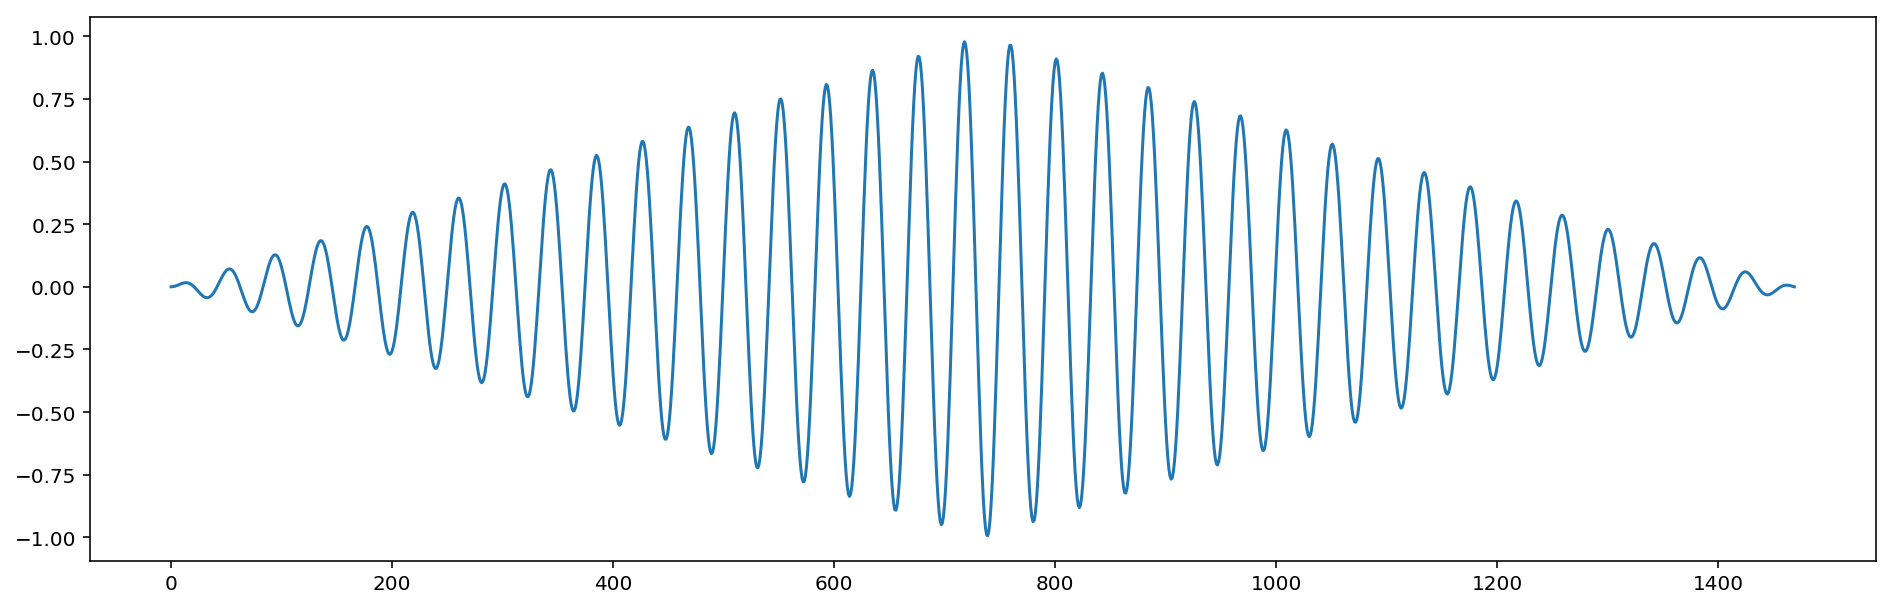

In [10]:
plt.plot(comm.modpulse[0])

In [11]:
sd.play(S)

In [12]:
W = sd.playrec(pad(S), samplerate=FS, channels=1, blocking=False).ravel()

In [25]:
sd.stop()

In [13]:
#if you want to save the recording uncomment this line
#wav.write(data=W, filename='w.wav', rate=FS)

In [14]:
#if you want to read a saved recording uncomment next line
# FS, W = wav.read('w.wav')

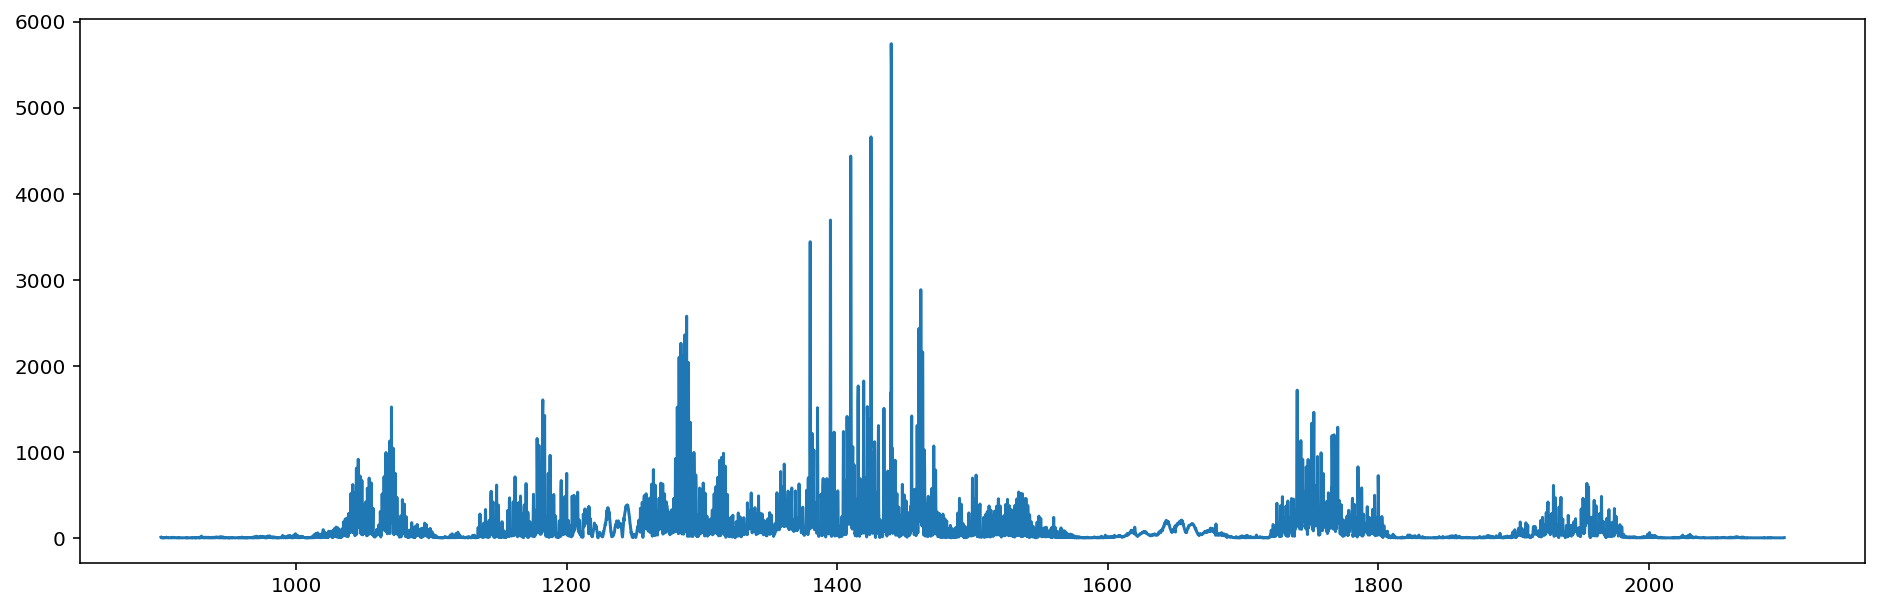

In [13]:
tester.plot_frequencies(W)

In [14]:
wr = comm.decode(W)

In [15]:
wr

'01000100011001010110011001100101011011000010000001110111011001110111011101100111011001000100010001100101011001000110110001101111001000000111011101100111011101110110011101100100010001000110010101100100011011000110110000100000011101110110011101110111011001110110010001000100011001010110010001101100011011000010000001110111011001110111011101100111011001000100010001100101011001000110110001101100001000000111011101100111011101110110011101100100'

In [ ]:
sd.play()

In [16]:
wr = comm.decode(W)

In [34]:
0.23**4

0.0027984100000000003

In [17]:
tester.diff(wr, r)

('0100XXXX011001010110XXXX0110XXXX0110XXXX00100000011101110110XXXX0111XXXX0110XXXX011001000100XXXX011001010110XXXX011011000110111100100000011101110110XXXX0111XXXX0110XXXX011001000100XXXX011001010110XXXX011011000110XXXX00100000011101110110XXXX0111XXXX0110XXXX011001000100XXXX011001010110XXXX011011000110XXXX00100000011101110110XXXX0111XXXX0110XXXX011001000100XXXX011001010110XXXX011011000110XXXX00100000011101110110XXXX0111XXXX0110XXXX01100100',
 0.2727272727272727)